# Task 2

Perform hyper-parameter tuning on the DecisionTree algorithm in order to predict the target column "outcome" for the status of each horse in the dataset. Use 5-fold cross-validation for the hyper-parameter tuning, tune the parameters "criterion", "max_depth", and "min_samples_split". Provide at least 3 values for each parameter.

## Dataset description

### Features

* id - horse identifier
* surgery - was the horse in surgery (0 - no, 1 - yes)
* age - if the horse is young or old (0 - old, 1 - young)
* hospital_number - the identifier of the hospital the horse was treated in
* rectal_temp - the horse's rectal temperature
* respiratory_rate - the horse's respiratory rate
* temp_of_extremities - the horse's temperature of the extremities (represented as categories ordered by intensity)
* pulse - the horse's pulse
* nasogastric_reflux_ph - ph value of the horse's nasogastric reflux
* packed_cell_volume - volume of horse's packed cell
* total_protein - horse's total protein value
* abdomo_protein - horse's abdominal protein value
* surgical_lesion - whether the horse has a surgical lesion or not
* lesion_1 - size of the lesion (0 if the horse doesn't have one)
* cp_data - binary variable

### Target variable
outcome

### Download the dataset

In [1]:
import pandas as pd

df = pd.read_csv('data_train.csv')

In [2]:
df.head()

id  surgery  age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0   0        1    0           530001         38.1  132.0              24.0   
1   1        1    0           533836         37.5   88.0              12.0   
2   2        1    0           529812         38.3  120.0              28.0   
3   3        1    0          5262541         37.1   72.0              30.0   
4   4        0    0          5299629         38.0   52.0              48.0   

   temp_of_extremities  nasogastric_reflux_ph  packed_cell_volume  \
0                    2                    6.5                57.0   
1                    2                    2.0                33.0   
2                    2                    3.5                37.0   
3                    1                    2.0                53.0   
4                    3                    7.0                47.0   

   total_protein  abdomo_protein  surgical_lesion  lesion_1  cp_data  \
0            8.5             3.4                1      2209        0   
1           64.0             2.0                1      2208        0   
2            6.4             3.4                1      5124        0   
3            7.0             3.9                1      2208        1   
4            7.3             2.6                0         0        1   

      outcome  
0        died  
1  euthanized  
2       lived  
3       lived  
4       lived

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   int64  
 2   age                    1235 non-null   int64  
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   int64  
 8   nasogastric_reflux_ph  1235 non-null   float64
 9   packed_cell_volume     1235 non-null   float64
 10  total_protein          1235 non-null   float64
 11  abdomo_protein         1235 non-null   float64
 12  surgical_lesion        1235 non-null   int64  
 13  lesion_1               1235 non-null   int64  
 14  cp_data                1235 non-null   int64  
 15  outc

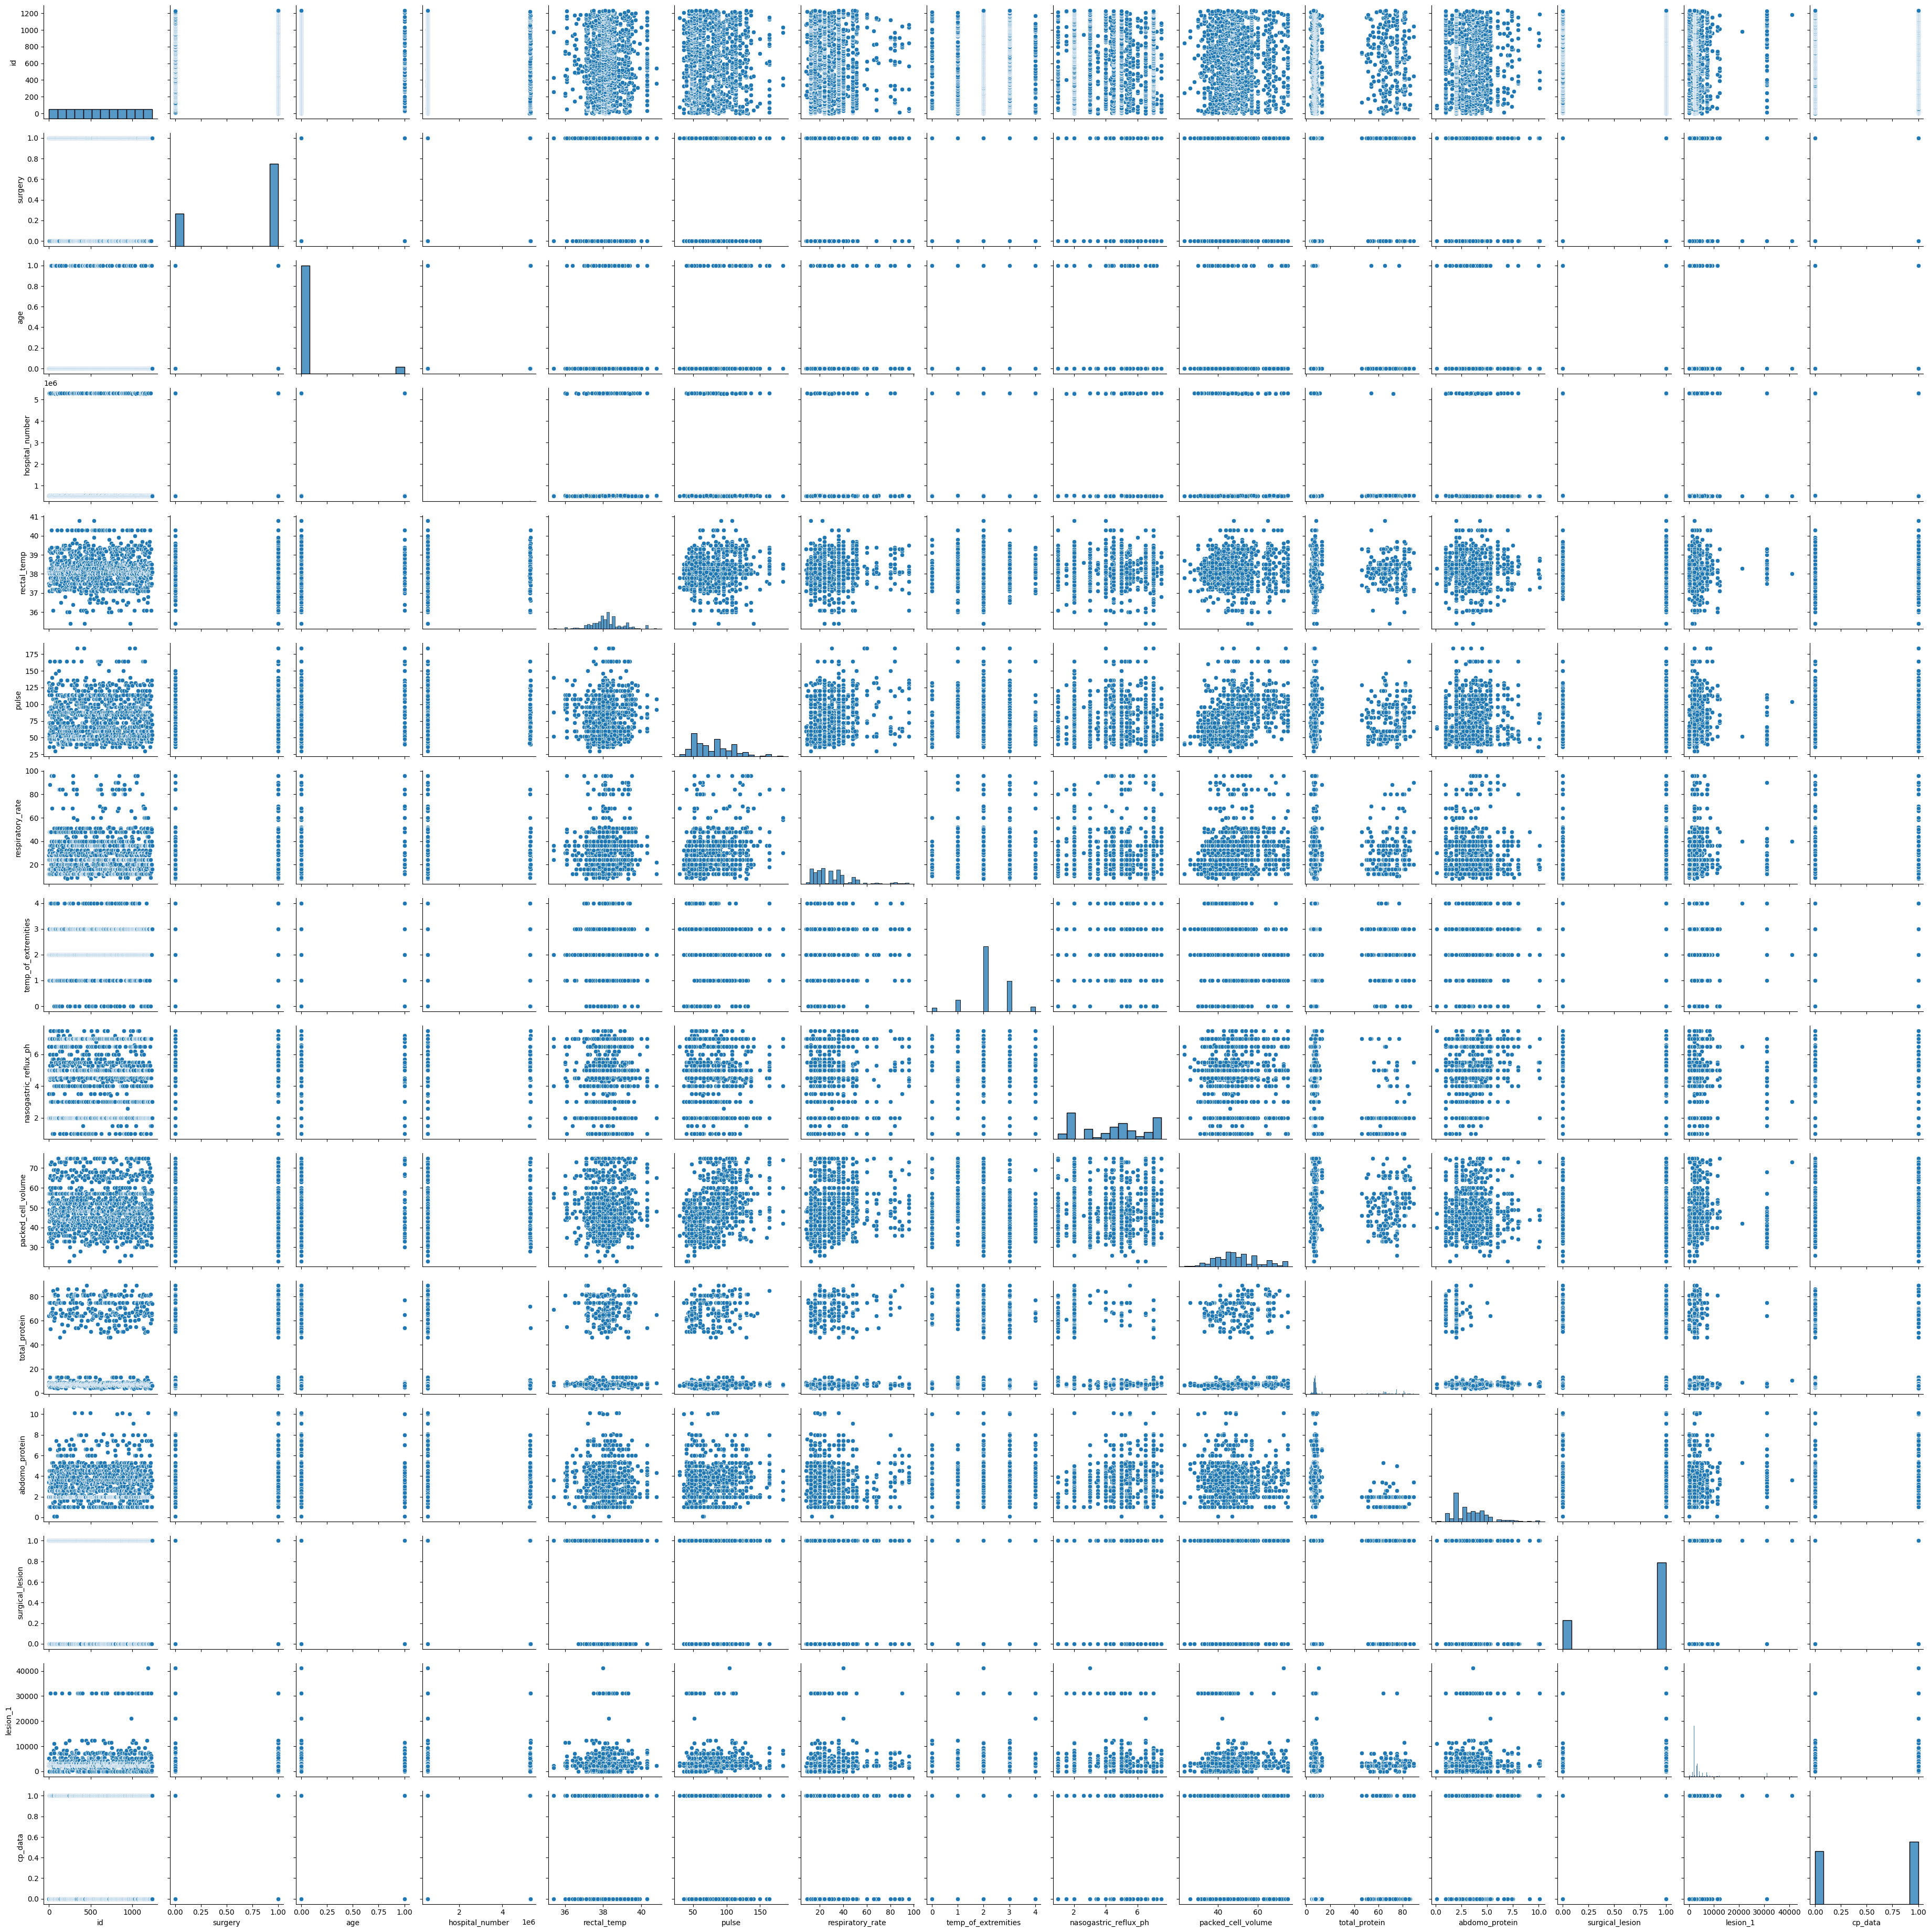

In [4]:
import seaborn as sns

sns.pairplot(df)

In [6]:
df['outcome'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

target: <15 class --> classification problem / else: regression

In [7]:
X = df.drop(['id','outcome'],axis=1)
Y = df['outcome']

<Axes: >

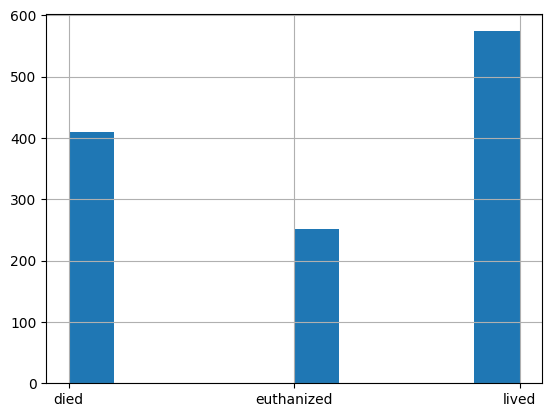

In [8]:
Y.hist()

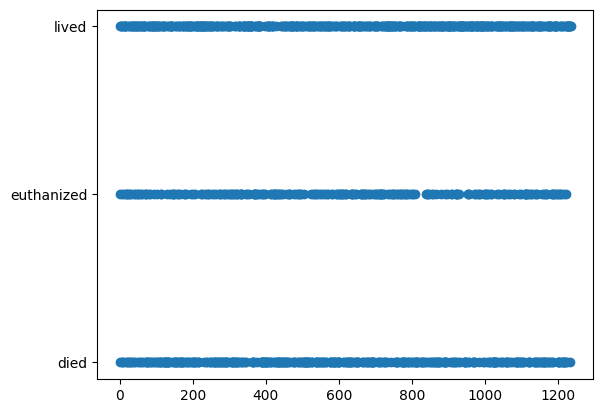

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(df['id'],df['outcome'])

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

.tr..|.tr...|..tr..|...tr|..test...

In [11]:
from sklearn.model_selection import KFold, RepeatedKFold
#podatochnoto m-vo: (1,2,3,4,5) 4-train 1-test x5 vo plus 1 iteracii
rkf = RepeatedKFold(n_splits=5)
rkf.get_n_splits(X, Y)


50

In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [13]:
param_grid ={
    'criterion':["gini", "entropy", "log_loss"],
    'max_depth': [10,15,20,25],
    'min_samples_split': [4,8,12]
}

In [14]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator=model,param_grid=param_grid,cv=rkf)

In [20]:
cv.fit(X,Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 15, 20, 25],
                         'min_samples_split': [4, 8, 12]})

In [21]:
cv.best_score_

np.float64(0.6023481781376518)

In [22]:
model = cv.best_estimator_

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,y_pred)

0.8461538461538461

#XGBoost

In [25]:
!pip install xgboost

     -------------------------------------- 124.9/124.9 MB 3.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
Y_train = enc.fit_transform(Y_train)
Y_test = enc.transform(Y_test)

In [83]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.1)

In [85]:
param_grid = {
    'learning_rate' :[0.1,0.9,0.5],
    'colsample_bylevel': [0.6,0.7,0.8],
    'max_depth' :[10,8,15]
}

In [84]:
model.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)>

In [47]:
model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [50]:
y_pred = model.predict(X_test)

In [51]:
accuracy_score(Y_test,y_pred)

0.6518218623481782

In [52]:
!pip install catboost

   ---------------------------------------- 0.0/101.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.8 MB 991.0 kB/s eta 0:01:43
   ---------------------------------------- 0.1/101.8 MB 1.1 MB/s eta 0:01:37
   ---------------------------------------- 0.1/101.8 MB 1.2 MB/s eta 0:01:24
   ---------------------------------------- 0.2/101.8 MB 1.7 MB/s eta 0:01:01
   ---------------------------------------- 0.3/101.8 MB 1.4 MB/s eta 0:01:12
   ---------------------------------------- 0.4/101.8 MB 1.5 MB/s eta 0:01:07
   ---------------------------------------- 0.4/101.8 MB 1.5 MB/s eta 0:01:06
   ---------------------------------------- 0.6/101.8 MB 1.9 MB/s eta 0:00:54
   ---------------------------------------- 0.7/101.8 MB 1.9 MB/s eta 0:00:55
   ---------------------------------------- 0.8/101.8 MB 1.9 MB/s eta 0:00:52
   ---------------------------------------- 1.0/101.8 MB 2.2 MB/s eta 0:00:46
   ---------------------------------------- 1.3/101.8 MB 2.4 MB/s eta

In [54]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

In [55]:
model.fit(X_train,Y_train)

Learning rate set to 0.079078
0:	learn: 1.0628301	total: 156ms	remaining: 2m 35s
1:	learn: 1.0323282	total: 169ms	remaining: 1m 24s
2:	learn: 1.0052247	total: 192ms	remaining: 1m 3s
3:	learn: 0.9776811	total: 203ms	remaining: 50.5s
4:	learn: 0.9571652	total: 211ms	remaining: 42s
5:	learn: 0.9363174	total: 216ms	remaining: 35.9s
6:	learn: 0.9184888	total: 221ms	remaining: 31.3s
7:	learn: 0.9008072	total: 225ms	remaining: 28s
8:	learn: 0.8835376	total: 233ms	remaining: 25.6s
9:	learn: 0.8710933	total: 238ms	remaining: 23.6s
10:	learn: 0.8573747	total: 243ms	remaining: 21.8s
11:	learn: 0.8441298	total: 247ms	remaining: 20.4s
12:	learn: 0.8323094	total: 251ms	remaining: 19.1s
13:	learn: 0.8211685	total: 255ms	remaining: 18s
14:	learn: 0.8109780	total: 260ms	remaining: 17.1s
15:	learn: 0.8024894	total: 267ms	remaining: 16.4s
16:	learn: 0.7938806	total: 271ms	remaining: 15.7s
17:	learn: 0.7877539	total: 275ms	remaining: 15s
18:	learn: 0.7785531	total: 280ms	remaining: 14.5s
19:	learn: 0.7707

In [56]:
y_pred = model.predict(X_test)

In [57]:
accuracy_score(Y_test,y_pred)

0.680161943319838

In [67]:
Y = df.rectal_temp
X = df.drop(['id','rectal_temp'],axis=1)
X['outcome']=enc.fit_transform(X['outcome'])

In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [69]:
X_train

surgery  age  hospital_number  pulse  respiratory_rate  \
274         1    0           528548   66.0              12.0   
665         1    0           534519   84.0              40.0   
254         1    0           528298   40.0              14.0   
985         1    0           527702  132.0              66.0   
507         1    0          5287179  124.0              30.0   
...       ...  ...              ...    ...               ...   
878         1    0           533886   88.0              48.0   
1176        1    0           528469  136.0              24.0   
1035        0    0           528469   48.0              24.0   
509         1    0           528743   75.0              36.0   
650         0    0           529663  114.0              36.0   

      temp_of_extremities  nasogastric_reflux_ph  packed_cell_volume  \
274                     2                    3.0                44.0   
665                     2                    2.0                75.0   
254                     3                    7.0                40.0   
985                     3                    7.0                57.0   
507                     2                    6.5                52.0   
...                   ...                    ...                 ...   
878                     2                    2.0                55.0   
1176                    2                    3.0                43.0   
1035                    3                    7.0                45.0   
509                     3                    5.0                48.0   
650                     2                    7.0                57.0   

      total_protein  abdomo_protein  surgical_lesion  lesion_1  cp_data  \
274             6.0             3.6                1      2124        1   
665            81.0             2.0                0      1400        0   
254             7.2             2.8                1      3111        1   
985             8.1             3.4                1      2208        0   
507             7.5             2.6                1      5124        0   
...             ...             ...              ...       ...      ...   
878            64.0             2.0                0      3205        0   
1176            7.5             3.6                1      2209        1   
1035            7.5             2.6                0      2113        1   
509             7.4             3.2                1      1400        0   
650             8.1             4.5                1      7400        1   

      outcome  
274         2  
665         1  
254         2  
985         2  
507         0  
...       ...  
878         1  
1176        0  
1035        2  
509         0  
650         0  

[1111 rows x 14 columns]

In [77]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
model = CatBoostRegressor()

In [78]:
model.fit(X_train,Y_train)

Learning rate set to 0.04163
0:	learn: 0.7836277	total: 3.02ms	remaining: 3.02s
1:	learn: 0.7786805	total: 5.09ms	remaining: 2.54s
2:	learn: 0.7742690	total: 7.2ms	remaining: 2.39s
3:	learn: 0.7701933	total: 9.19ms	remaining: 2.29s
4:	learn: 0.7668684	total: 11.1ms	remaining: 2.22s
5:	learn: 0.7628756	total: 13.2ms	remaining: 2.18s
6:	learn: 0.7592386	total: 15ms	remaining: 2.13s
7:	learn: 0.7557169	total: 17.1ms	remaining: 2.12s
8:	learn: 0.7517625	total: 19.1ms	remaining: 2.11s
9:	learn: 0.7486641	total: 22ms	remaining: 2.18s
10:	learn: 0.7451513	total: 24.2ms	remaining: 2.17s
11:	learn: 0.7423900	total: 26.2ms	remaining: 2.15s
12:	learn: 0.7395095	total: 28.1ms	remaining: 2.13s
13:	learn: 0.7371426	total: 29.9ms	remaining: 2.1s
14:	learn: 0.7343203	total: 31.7ms	remaining: 2.08s
15:	learn: 0.7309692	total: 33.6ms	remaining: 2.07s
16:	learn: 0.7280322	total: 35.5ms	remaining: 2.05s
17:	learn: 0.7252808	total: 37.3ms	remaining: 2.04s
18:	learn: 0.7235103	total: 39ms	remaining: 2.01s
1

In [79]:
y_pred = model.predict(X_test)

In [80]:
from sklearn.metrics import mean_absolute_error,r2_score

In [81]:
mean_absolute_error(Y_test,y_pred)

0.5131907126560333

In [82]:
r2_score(Y_test,y_pred)

0.16551492054624473